# EE 379K Lab 4

## Rohan Nagar and Wenyang Fu

In [4]:
import numpy as np
import scipy as sp
import sympy
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Problem 1: Linear Algebra in Python

## Part 1

Consider the linear subspace $S = span\{v_1, v_2, v_3, v_4\}$ where $v_1 = [1, 2, 3, 4]$, $v_2 = [0, 1, 0, 1]$, $v_3 = [1, 4, 3, 6]$, $v_4 = [2, 11, 6, 15]$. Create a vector inside $S$ different from $v_1, v_2, v_3, v_4$. Create a vector not in $S$. How would you check if a new vector is in $S$?

In [5]:
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
mat = np.vstack((v1, v2, v3, v4))
reduced = sympy.Matrix(mat).rref()
print(reduced)

(Matrix([
[1.0,   0, 3.0, 2.0],
[  0, 1.0,   0, 1.0],
[  0,   0,   0,   0],
[  0,   0,   0,   0]]), [0, 1])


### Vector is contained in $S$

In [6]:
vec_in_s = np.array([2, 4, 6, 8])
mat1 = np.vstack((mat, vec_in_s))
reduced = sympy.Matrix(mat1).rref()
reduced

(Matrix([
 [1.0,   0, 3.0, 2.0],
 [  0, 1.0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1])

We can see that it is contained in $S$ because the linear subspace remains the same when reduced.

### Vector not contained in $S$

In [7]:
vec_not_in_s = np.array([1, 1, 3, 4])
mat2 = np.vstack((mat, vec_not_in_s))
reduced = sympy.Matrix(mat2).rref()
reduced

(Matrix([
 [1.0,   0, 3.0,   0],
 [  0, 1.0,   0,   0],
 [  0,   0,   0, 1.0],
 [  0,   0,   0,   0],
 [  0,   0,   0,   0]]), [0, 1, 3])

The linear subspace when reduced is not the same, so we can see that our new vector is not in $S$.

### How would you check if a new vector is in $S$?

A: If a new vector is in $S$, then it must be expressable as a linear combination of the existing vectors in $S$.

## Part 2

Find the dimension of the subspace $S$.

A: The dimension of the subspace is 2.

In [8]:
mat = np.vstack((v1, v2, v3, v4))
reduced = sympy.Matrix(mat).rref()
s = np.array(reduced[0].tolist())  # Convert sympy matrix back to np.ndarray
s = s[~np.all(s == 0, axis=1)] # Drop non-linearly independent vectors
s = s.astype(np.float64) # Typecast sympy floats back into numpy floats
print(s)
print('Rank: {}'.format(s.shape[0]))
rank = s.shape[0]

[[ 1.  0.  3.  2.]
 [ 0.  1.  0.  1.]]
Rank: 2


## Part 3

Find an orthonormal basis for the subspace S.

A: The QR decomposition provides an easy way to find an orthornomal basis for the subspace S. The first $n$ columns of $Q$ (where $n = rank(span(S))$) constitute an orthonormal basis of $S$.

In [9]:
# Help from here:
# https://stackoverflow.com/questions/27176453/scipy-find-bases-of-column-space-of-matrix

q,r = np.linalg.qr(mat.T) # Transpose matrix to find column basis as opposed to row basis
print(q)
print(r)
orthonormal_basis = q[:, :rank]
print('\nOrthonormal Basis:\n{}'.format(orthonormal_basis))

[[-0.18257419  0.2236068   0.91610405  0.27824457]
 [-0.36514837 -0.67082039  0.26916143 -0.58670162]
 [-0.54772256  0.67082039 -0.12592707 -0.4838826 ]
 [-0.73029674 -0.2236068  -0.26916143  0.58670162]]
[[ -5.47722558e+00  -1.09544512e+00  -7.66811581e+00  -1.86225670e+01]
 [  0.00000000e+00  -8.94427191e-01  -1.78885438e+00  -6.26099034e+00]
 [  0.00000000e+00   0.00000000e+00  -4.00296604e-16   1.47801823e-15]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   6.15840930e-16]]

Orthonormal Basis:
[[-0.18257419  0.2236068 ]
 [-0.36514837 -0.67082039]
 [-0.54772256  0.67082039]
 [-0.73029674 -0.2236068 ]]


## Part 4

Solve the optimization problem $min_{x \in S}\| x - z^* \|_2$ where $z^* = [1, 0, 0, 0]$

In [10]:
# TODO

# Problem 2: PCA

## Part 1



/Users/rohannagar/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


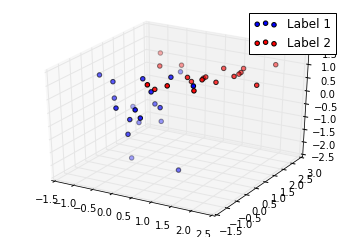

In [11]:
# Covariance matrices
cov1 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.7]]
cov2 = [[0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.01]]

# Generate the samples
label1_samples = np.random.multivariate_normal([0, 0, 0], cov1, 20)
label2_samples = np.random.multivariate_normal([1, 1, 1], cov2, 20)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label1_samples.T[0], label1_samples.T[1], label1_samples.T[2], label='Label 1')
ax.scatter(label2_samples.T[0], label2_samples.T[1], label2_samples.T[2], c='r', label='Label 2')
ax.legend()
fig.show()

## Part 2

What do the points look like?

#### The label 1 points are labled in blue above. These points are more spread out and they go much lower in the $z$ direction than the label 2 points. It is also generally lower in value in the $x$ direction than the label 2 points. The label 2 points are more compact and closer together. They form more of an ellipsoid shape than the label 1 points.

## Part 3

In [12]:
def covariance(X, Y):
    ''' 
    Finds the covariance of the two arrays X and Y.
    X and Y must be the same length.
    '''
    if len(X) is not len(Y):
        return None
    
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)
    
    total = 0
    for x, y in zip(X, Y):
        total += (x-X_mean)*(y-Y_mean)
        
    return total / (len(X) - 1)

# Concatenate
samples = label1_samples + label2_samples

# Calculate the covariance matrix
cov = [[covariance(col, col2) for col2 in samples.T] for col in samples.T]
print(np.array(cov))

[[ 0.70172107  0.22774451  0.16628828]
 [ 0.22774451  1.2049266  -0.02366591]
 [ 0.16628828 -0.02366591  0.85421726]]


## Part 4

In [13]:
def largest_eigenvectors(cov):
    values, vectors = np.linalg.eig(cov)
    
    largest = max(values)
    second_largest = max(np.delete(values, np.nonzero(values==largest)[0][0]))

    first_vector = vectors[:,np.nonzero(values==largest)[0][0]]
    second_vector = vectors[:,np.nonzero(values==second_largest)[0][0]]
    
    return first_vector, second_vector
    

def normalize(x):
    return [x[i] / np.linalg.norm(x) for i in range(len(x))]


def project_onto_plane(x, n):
    d = np.dot(x, n) / np.linalg.norm(n)
    p = [d * normalize(n)[i] for i in range(len(n))]
    return [x[i] - p[i] for i in range(len(x))]
    
eigenvectors = largest_eigenvectors(cov)

# TODO: project label1_samples and label2_samples onto the two eigenvectors and plot with labels
print(eigenvectors[0])
print(label1_samples)
projected1 = [project_onto_plane(sample, eigenvectors[0]) for sample in label1_samples]
print(np.array(projected1))

[-0.37880406 -0.92077102 -0.09321063]
[[-0.01954661 -0.638102   -0.1983039 ]
 [-0.00664864  1.8048758   0.56116728]
 [ 1.24220652 -0.01611365  1.12462703]
 [-0.22196041 -0.22604262 -1.92580956]
 [ 0.31050241 -0.23233542  0.74718341]
 [-0.71866158 -0.06913651  0.16145481]
 [ 0.46309192  0.42319085  1.05288201]
 [-0.30279263  0.30713184 -0.81850805]
 [ 0.23026008 -0.83731388  0.32347347]
 [-0.7073722   0.77248622 -0.52013381]
 [ 0.08925254  0.65315795 -0.81392884]
 [-0.04558457 -0.6906767  -0.73739691]
 [-0.77911705 -0.00328515  0.72991125]
 [-1.15205822  0.05046086  0.8583283 ]
 [ 0.02182022  0.48381848 -0.09088627]
 [ 0.34225626  0.1263408   0.01629086]
 [ 1.03020781 -0.31492531 -1.96356587]
 [ 0.35994924 -0.84583477  0.0609339 ]
 [-0.0632799   0.08274168  0.99378597]
 [-0.30239596 -0.74775658  0.19834731]]
[[ 0.21282475 -0.07326957 -0.14112531]
 [-0.6550345   0.22882377  0.40162186]
 [ 1.02987053 -0.53224548  1.07237845]
 [-0.04327137  0.20830249 -1.88184034]
 [ 0.32060235 -0.20778517

Did PCA make it easier to distingush the two labels in two dimensions?

#### TODO: Answer here.

# Problem 3: Low Rank Approximation

## Part 1

Load the Mona Lisa image (in grayscale) and treat it as a matrix M. Perform a SVD on this matrix using $\tt{linalg.svd}$. You can perform a low-rank approximation by zeroing out singular values and keeping only the top $k$. Show the best rank for $k = 2$, $k = 5$, and $k = 10$ approximation to Mona Lisa.

(603, 400)

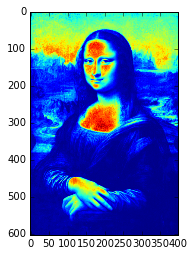

In [104]:
# Load the image as a grayscale image
from scipy.misc import imread
M = imread('mona_lisa.png',flatten=True)
plt.imshow(M)
M.shape

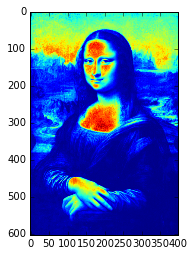

In [107]:
from skimage import io

M = io.imread('mona_lisa.png', as_grey=True)
plt.imshow(M)

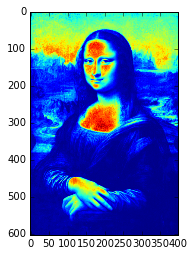

In [103]:
# Convert image from RGBA to RGB, and then to grayscale
# Help from:
# https://stackoverflow.com/questions/22977103/matplotlib-equivalent-to-skimage-io-imreadfname-as-grey-true
M = M[:, :, :3]
M.shape

M = ([0.2125, 0.7154, 0.0721] * M).sum(axis=2)
plt.imshow(M)
# import PIL.Image

# img = Image.open(FILENAME).convert('L')
# arr = np.array(img)

In [108]:
u, s, v = np.linalg.svd(M)

print(M.shape)
print(u.shape)
print(s.shape)
print(v.shape)
print(M[0:2])

(603, 400)
(603, 603)
(400,)
(400, 400)
[[ 0.08627451  0.26666667  0.26666667  0.28235294  0.30588235  0.35294118
   0.3254902   0.31372549  0.36078431  0.3372549   0.33333333  0.37647059
   0.35686275  0.33333333  0.39607843  0.38431373  0.38823529  0.36862745
   0.34117647  0.36862745  0.40784314  0.41176471  0.40392157  0.36470588
   0.35294118  0.35294118  0.35294118  0.38823529  0.37647059  0.35686275
   0.32941176  0.35294118  0.39607843  0.41960784  0.39607843  0.37254902
   0.45882353  0.36470588  0.39607843  0.43137255  0.41960784  0.40392157
   0.41568627  0.41960784  0.45490196  0.40784314  0.38039216  0.37647059
   0.34509804  0.36078431  0.3254902   0.37647059  0.38431373  0.35294118
   0.31764706  0.34901961  0.31764706  0.33333333  0.34509804  0.30588235
   0.30588235  0.32941176  0.35686275  0.38431373  0.35294118  0.30980392
   0.38039216  0.39215686  0.35686275  0.34117647  0.34509804  0.39607843
   0.43137255  0.41176471  0.4         0.35294118  0.36862745  0.3137254

### Rank 2 Approximiation

(400,)
(400, 400)
[[ 125.20162129    0.            0.         ...,    0.            0.            0.        ]
 [   0.           42.85866757    0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]]


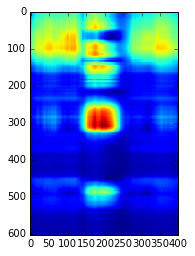

In [113]:
# Got inspiration from here:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

s_rank2 = np.copy(s)
print(s_rank2.shape)
s_rank2[2:] = 0

S = np.zeros(M.shape)
result = np.diag(s_rank2)
print(result.shape)
S[:400, :400] = result
print(S)
rank2_approx = u @ S @ v
plt.imshow(rank2_approx)

# Rank 5 Approximiation

(400,)
(400, 400)
[[ 125.20162129    0.            0.         ...,    0.            0.            0.        ]
 [   0.           42.85866757    0.         ...,    0.            0.            0.        ]
 [   0.            0.           25.01965875 ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]]


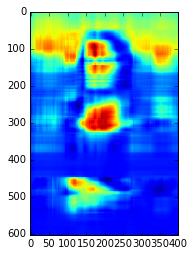

In [114]:
s_rank5 = np.copy(s)
print(s_rank5.shape)
s_rank5[5:] = 0

S = np.zeros(M.shape)
result = np.diag(s_rank5)
print(result.shape)
S[:400, :400] = result
print(S)
rank5_approx = u @ S @ v
plt.imshow(rank5_approx)

# Rank 10 Approximiation

(400,)
(400, 400)
[[ 125.20162129    0.            0.         ...,    0.            0.            0.        ]
 [   0.           42.85866757    0.         ...,    0.            0.            0.        ]
 [   0.            0.           25.01965875 ...,    0.            0.            0.        ]
 ..., 
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]
 [   0.            0.            0.         ...,    0.            0.            0.        ]]


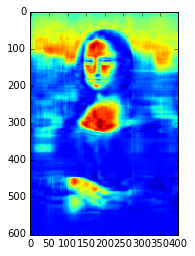

In [115]:
s_rank10 = np.copy(s)
print(s_rank10.shape)
s_rank10[10:] = 0

S = np.zeros(M.shape)
result = np.diag(s_rank10)
print(result.shape)
S[:400, :400] = result
print(S)
rank10_approx = u @ S @ v
plt.imshow(rank10_approx)

## Part 2

If each pixel is represented by two bytes, how many bits is your compressed Mona Lisa for each of those $k$ rank approximations?

### Answer:
1. 2-rank: 603 x 400 x 16 bits x 2 / 400 bits
2. 5-rank: 603 x 400 x 16 bits x 5 / 400 bits
3. 


# Problem 4: Kaggle

## Part 1

Make an account on Kaggle and find https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

# Part 2

Follow the data preprocessing steps from https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models. Then run a ridge regression using $\alpha = 0.1$. Make a submission of this prediciton, what is the RSME you get? (Hint: remember to exponentiate $\tt{np.expm1(ypred)}$ your predicitons).

In [24]:
import pandas as pd
from scipy.stats import skew

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

### Preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111fc5eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cf71d30>]], dtype=object)

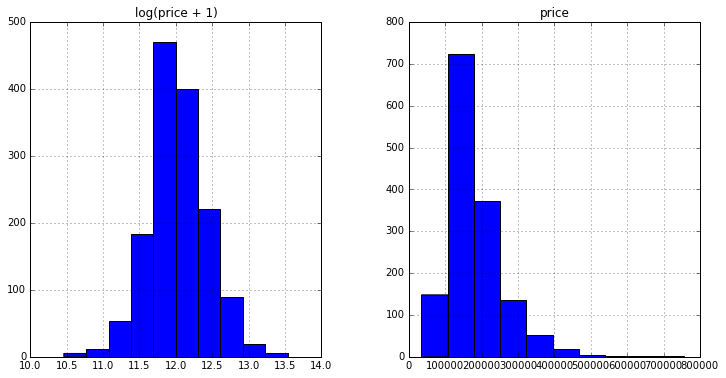

In [26]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [27]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)

In [28]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [29]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

### Run our Ridge model

In [30]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1).fit(X_train, y)
preds = np.expm1(model.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("solution.csv", index = False)

With $\alpha = 0.1$, the Ridge predictions submitted on Kaggle gave a score of $0.13029$.

## Part 3

Try to build the best model you can. Report the best RSME you got on the Kaggle wall and how you got it.

In [32]:
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
preds = np.expm1(model_lasso.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("lasso_solution.csv", index = False)

Using a Lasso model and searching over various Alphas, we can acheive a score of $0.12097$. This is the best RSME that we got on the Kaggle wall.